In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\asus\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df= pd.read_csv("star_classification.csv")
print(df.head())


         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.77913

In [4]:

rows,columns = df.shape
print(f"Number of rows/examples: {rows}")
print(f"Number of columns/features: {columns}")

print(df.info())

print(df.describe())

print(df.duplicated().sum())




Number of rows/examples: 100000
Number of columns/features: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber

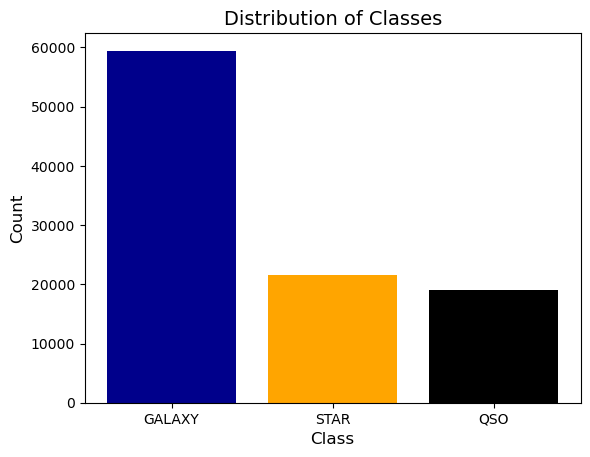

In [5]:
class_counts = df['class'].value_counts()
colors = ['#00008B', '#FFA500', '#000000']
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Classes', fontsize=14)
plt.show()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

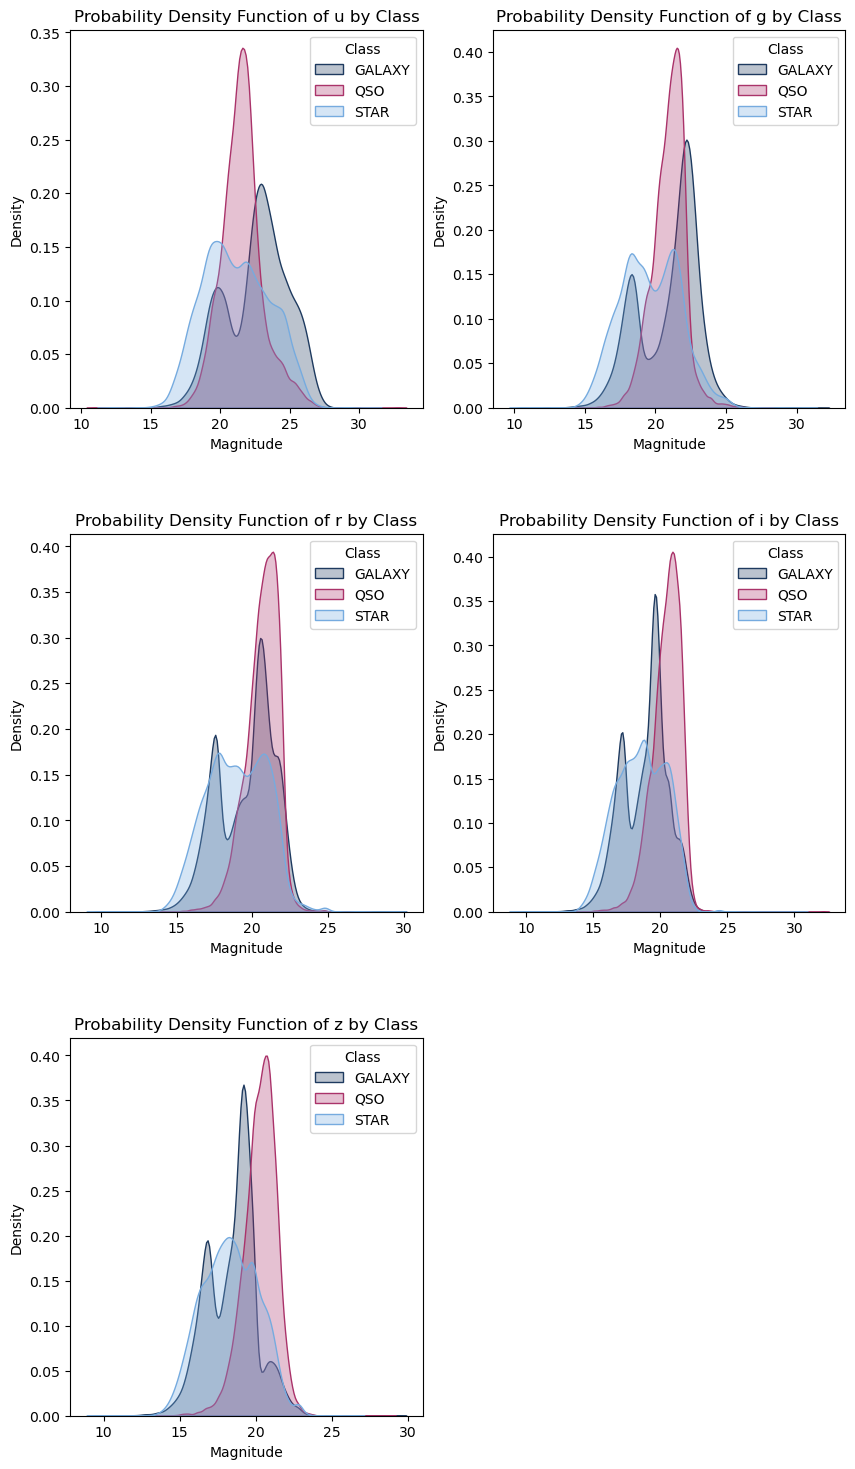

In [6]:
df = df[df['z'] >= 0]
features = ['u', 'g', 'r', 'i', 'z']
palette = ['#1e3a5f', '#AA336A', '#76ABDF']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 18))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    for j, class_name in enumerate(df['class'].unique()):
        class_data = df[df['class'] == class_name][feature]

        sns.kdeplot(class_data, ax=ax, label=f'{class_name}', color=palette[j % len(palette)], fill=True, alpha=0.3)

    ax.set_title(f'Probability Density Function of {feature} by Class')
    ax.set_xlabel('Magnitude')
    ax.set_ylabel('Density')
    ax.legend(title='Class')


axes[-1].axis('off')
plt.subplots_adjust(hspace=0.333)
plt.show()

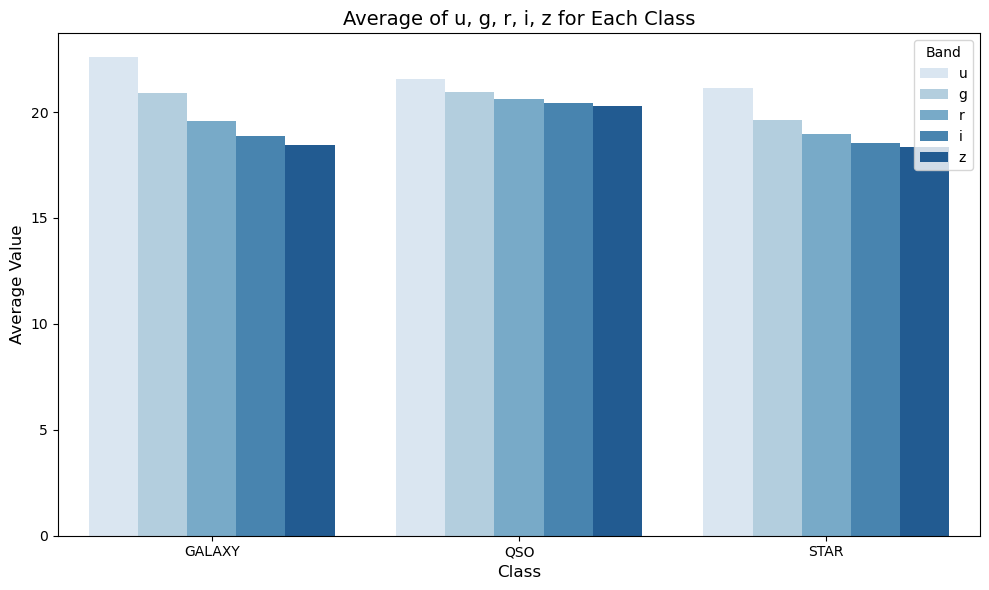

In [7]:
average_values = df.groupby('class')[['u', 'g', 'r', 'i', 'z']].mean().reset_index()

average_values_melted = average_values.melt(id_vars='class',
                                            value_vars=['u', 'g', 'r', 'i', 'z'],
                                            var_name='Band', value_name='Average')


plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='Average', hue='Band', data=average_values_melted, palette='Blues')

plt.title('Average of u, g, r, i, z for Each Class', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

plt.tight_layout()
plt.show()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


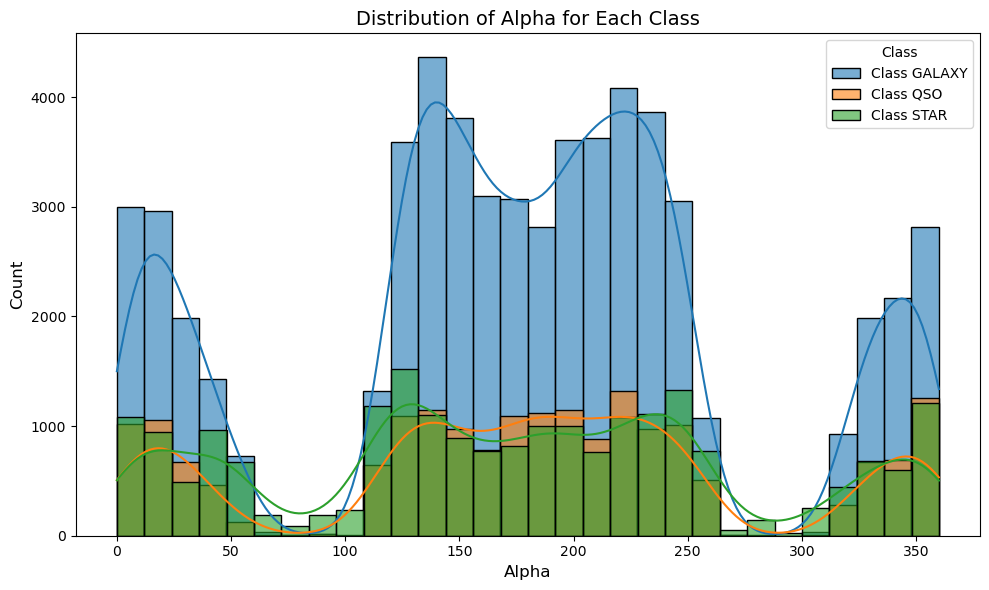

In [8]:

plt.figure(figsize=(10, 6))

for class_name in df['class'].unique():
    sns.histplot(df[df['class'] == class_name]['alpha'], label=f'Class {class_name}', kde=True, bins=30, alpha=0.6)


plt.title('Distribution of Alpha for Each Class', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Class')

plt.tight_layout()
plt.show()


c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


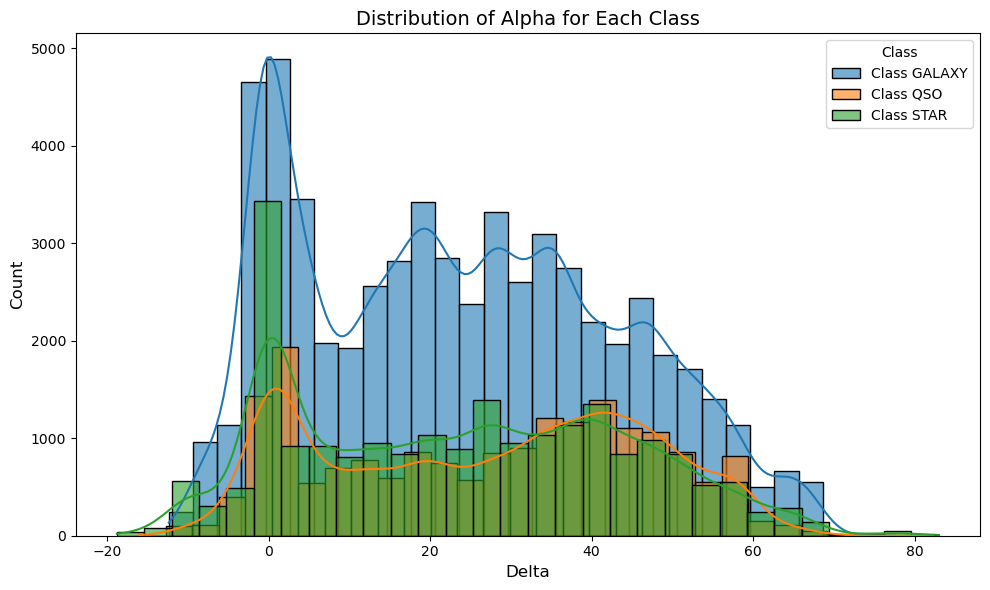

In [9]:
plt.figure(figsize=(10, 6))

for class_name in df['class'].unique():
    sns.histplot(df[df['class'] == class_name]['delta'], label=f'Class {class_name}', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of Alpha for Each Class', fontsize=14)
plt.xlabel('Delta', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


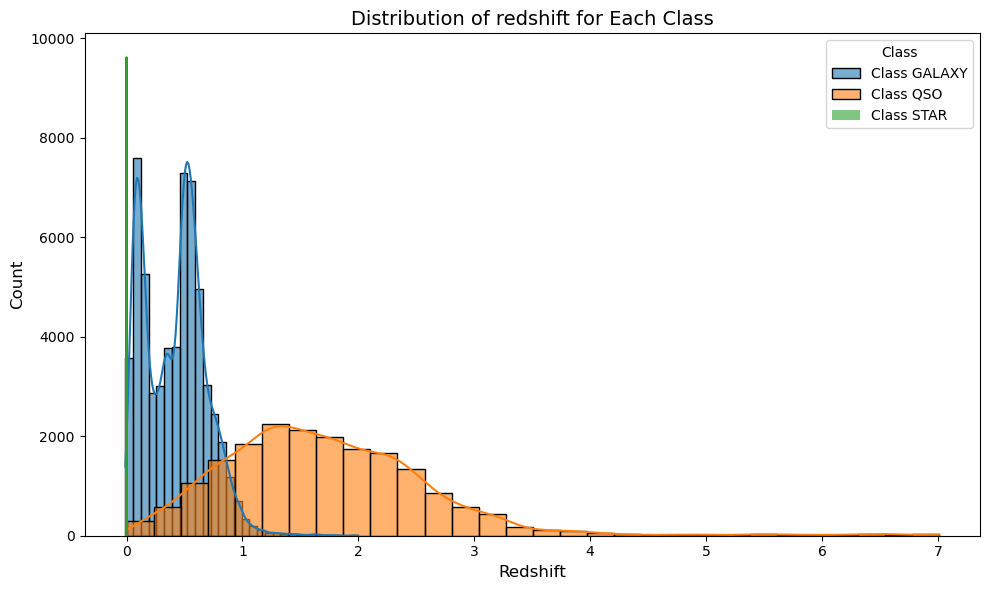

In [10]:
plt.figure(figsize=(10, 6))

for class_name in df['class'].unique():
    sns.histplot(df[df['class'] == class_name]['redshift'], label=f'Class {class_name}', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of redshift for Each Class', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

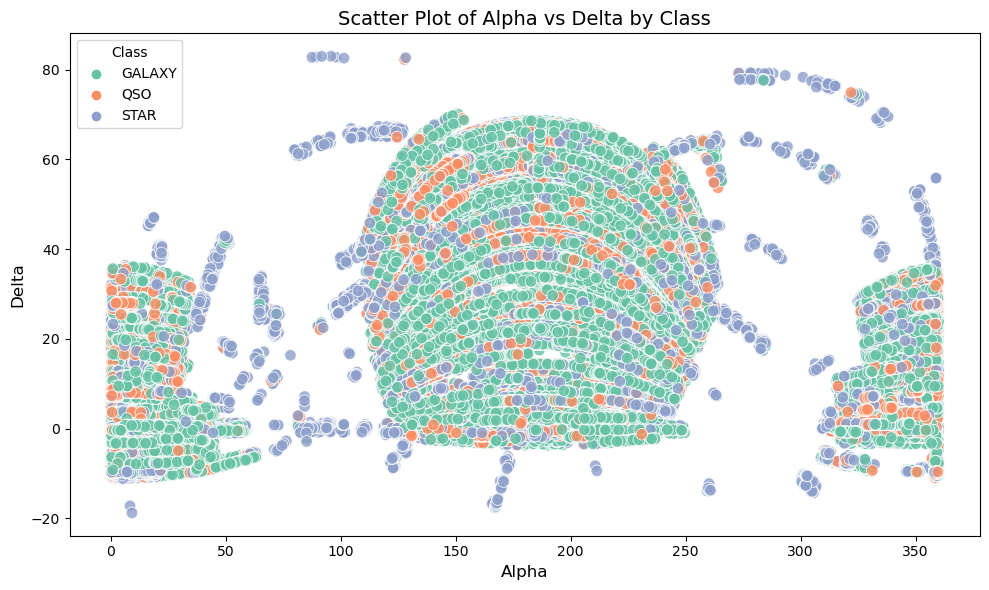

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alpha', y='delta', hue='class', palette='Set2', s=70, alpha=0.8)
plt.title('Scatter Plot of Alpha vs Delta by Class', fontsize=14)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Delta', fontsize=12)
plt.legend(title='Class')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
label_encoder = LabelEncoder()
df_copy['class_encoded'] = label_encoder.fit_transform(df_copy['class'])
numeric_df = df_copy.select_dtypes(include=[int, float])






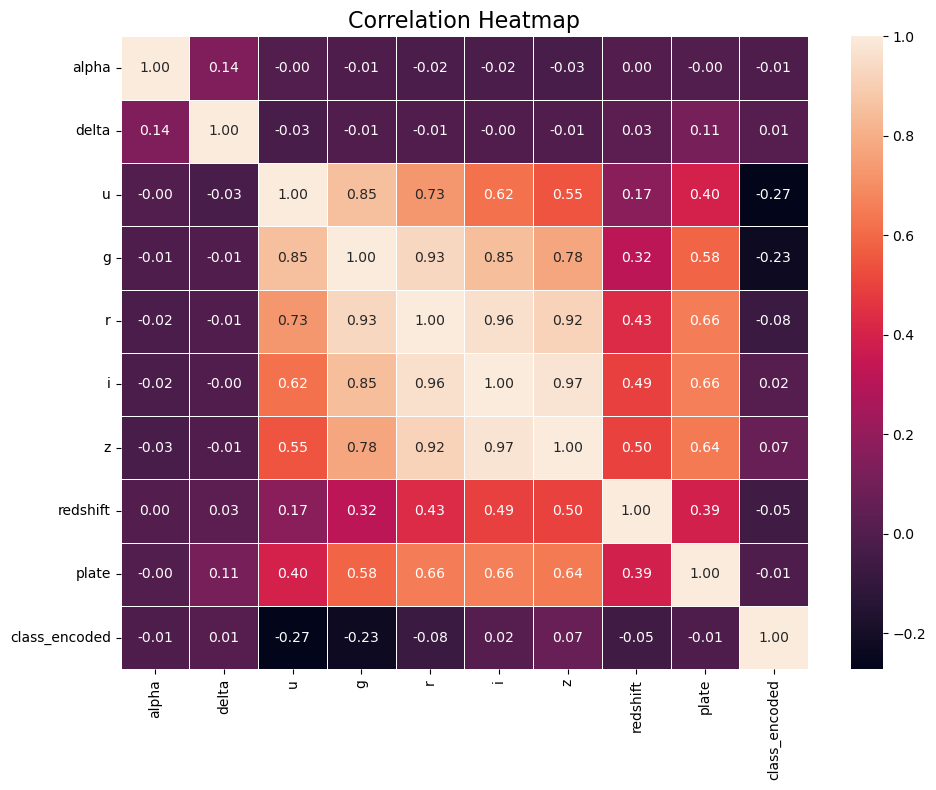

In [13]:
columns_to_drop = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID','MJD']
numeric_df.drop(columns=columns_to_drop, inplace=True)
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
def iqr(dataframe):
    outlier_indices = {}

    for column in dataframe.select_dtypes(include=[np.number]).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        outlier_indices[column] = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)].index.tolist()

    return outlier_indices


outliers = iqr(df)


for column, indices in outliers.items():
    if indices:
        print(f"\nOutliers for column '{column}':")
        print(f"  Outlier indices: {indices}")
    else:
        print(f"\nNo outliers found for column '{column}'.")


print(df.shape)



No outliers found for column 'obj_ID'.

No outliers found for column 'alpha'.

No outliers found for column 'delta'.

Outliers for column 'u':
  Outlier indices: [1046, 4401, 4472, 6839, 14227, 14498, 14829, 15666, 16206, 16370, 17275, 17874, 18153, 19400, 19525, 20225, 21245, 23852, 31397, 32640, 41968, 43174, 48085, 48670, 48671, 53840, 55197, 56693, 57763, 61260, 62363, 62647, 66906, 75369, 75583, 75620, 75784, 75962, 76321, 76986, 80120, 81298, 84084, 84995, 85089, 85177, 85404, 85873, 86081, 86100, 86409, 88730, 90019, 97776, 98485]

Outliers for column 'g':
  Outlier indices: [1124, 1708, 1735, 3067, 4160, 4232, 4401, 4472, 5512, 7758, 8008, 8872, 8996, 12673, 13023, 13872, 14170, 14227, 14256, 14462, 14498, 14829, 15666, 16115, 17275, 17486, 17800, 17874, 18153, 20439, 20567, 21245, 21272, 23852, 29095, 31094, 31397, 33854, 34735, 34839, 36565, 38547, 39059, 46549, 48085, 48670, 48671, 50638, 52518, 53079, 53840, 54731, 55887, 55997, 56132, 56318, 56693, 57763, 58607, 61260, 61

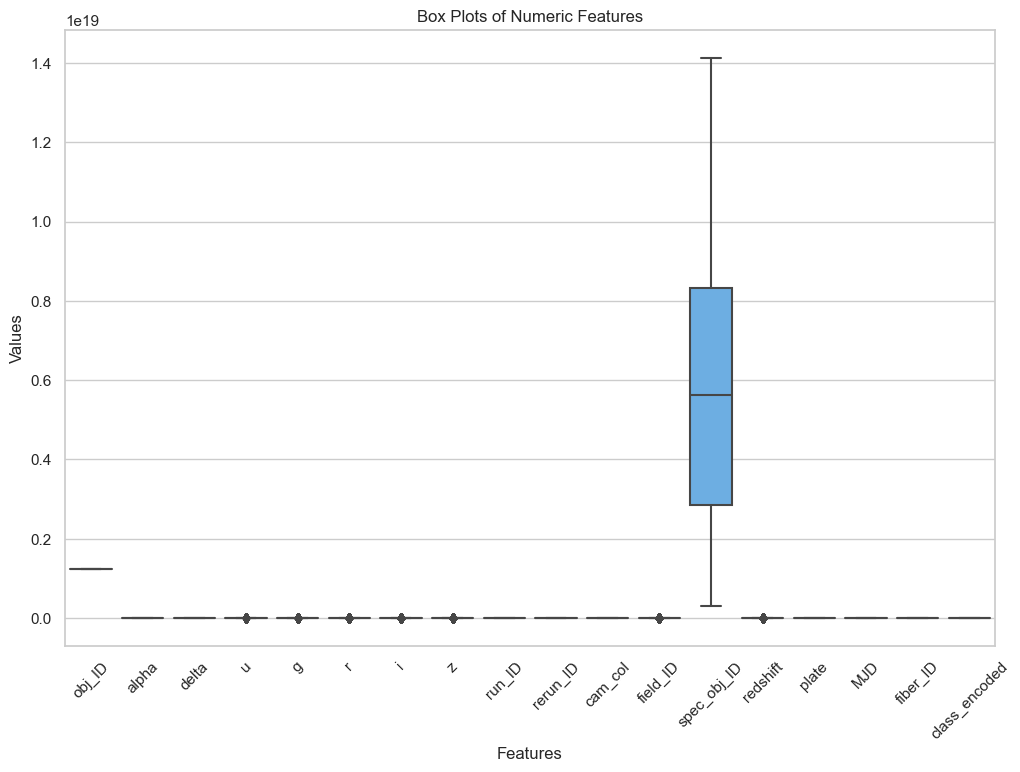

In [15]:
df['class_encoded'] = label_encoder.fit_transform(df_copy['class'])
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [16]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['u_scaled', 'g_scaled', 'r_scaled', 'i_scaled', 'z_scaled']] = scaler.fit_transform(df[['u', 'g', 'r', 'i', 'z']])



In [17]:
columns_to_drop = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID']
df.drop(columns=columns_to_drop, inplace=True)

In [18]:
from sklearn.model_selection import train_test_split

X = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]  # Relevant features
y = df['class_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
pipeline_rf = Pipeline([
    ('scaler', RobustScaler()),
    ('rf_classifier', RandomForestClassifier(class_weight='balanced', random_state=42) )
])

pipeline_dt = Pipeline([
    ('scaler', RobustScaler()),
    ('dt_classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_xgb = Pipeline([
    ('scaler', RobustScaler()),
    ('xgb_classifier', XGBClassifier(random_state=42))
])

pipeline_svc = Pipeline([
    ('scaler', RobustScaler()),
    ('svc_classifier', SVC(random_state=42))
])

pipelines = [pipeline_rf, pipeline_dt, pipeline_xgb,pipeline_svc]
pipe_dict = {0: "RandomForest", 1: "DecisionTree", 2: "XGBoost",3:"SVC"}


In [20]:
from sklearn.model_selection import cross_val_score

cv_results = []
for i, pipe in enumerate(pipelines):
    cv_score = cross_val_score(pipe, X_train, y_train, scoring="accuracy", cv=3)


    print(f"{pipe_dict[i]}: {cv_score.mean()} ± {cv_score.std()}")

for pipe in pipelines:
    pipe.fit(X_train, y_train)

RandomForest: 0.9768997154579745 ± 0.0007000995835506175
DecisionTree: 0.9643120465456794 ± 0.0006783998974298443
XGBoost: 0.975249681238281 ± 0.0006127552101641227
SVC: 0.964137062327072 ± 0.0015876385982164342


In [21]:
y_pred = pipelines[0].predict(X_test)

In [22]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98     11904
         QSO       0.96      0.92      0.94      3810
        STAR       0.99      1.00      1.00      4286

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [23]:
sample_input = pd.DataFrame({
    'alpha': [112.621367015952],
    'delta': [39.5207366233694],
    'u': [20.99528],
    'g': [18.36932],
    'r': [16.88827],
    'i': [15.94433],
    'z': [15.38927],
    'redshift': [-1.943]
})

predicted_class = pipelines[0].predict(sample_input)

print("Predicted class:", label_encoder.inverse_transform(predicted_class))

Predicted class: ['STAR']
